In [0]:
dbutils.library.installPyPI('mlflow')
dbutils.library.installPyPI('FBProphet', version='0.5') 
dbutils.library.installPyPI('holidays', version='0.9.12') 
dbutils.library.restartPython()

PyPI package mlflow has been installed already. The previously installed package is `mlflow`. To resolve this issue, detach and re-attach the notebook to create a new environment or rename the package.
PyPI package FBProphet has been installed already. The previously installed package is `FBProphet==0.5`. To resolve this issue, detach and re-attach the notebook to create a new environment or rename the package.
PyPI package holidays has been installed already. The previously installed package is `holidays==0.9.12`. To resolve this issue, detach and re-attach the notebook to create a new environment or rename the package.

In [0]:
displayHTML("""<font size="6"  face="sans-serif">Impact of COVID-19 on Air Traffic</font>""")

Impact of COVID-19 on Air Traffic

In [0]:
df = spark.read.format("delta").load("/mnt/BD-project/delta/covid_flights")

df.registerTempTable("covid_flights")

## Number of weekly flights world wide

In [0]:
display(spark.sql("SELECT week_year, SUM(flights) as flights FROM covid_flights GROUP BY week_year ORDER BY week_year"))

week_year flights 2020-01 203927 2020-02 300427 2020-03 287910 2020-04 294214 2020-05 301331 2020-06 312724 2020-07 316788 2020-08 332900 2020-09 330602 2020-10 327889 2020-11 306976 2020-12 227772 2020-13 128519 2020-14 98614 2020-15 84423 2020-16 82368 2020-17 86181 2020-18 91290 2020-19 98064 2020-20 106876 2020-21 110738 2020-22 116401 2020-23 128148 2020-24 140971 2020-25 151921 2020-26 162307 2020-27 166914 2020-28 185145 2020-29 194368 2020-30 196262 2020-31 193152 2020-32 202528 2020-33 198323 2020-34 203985 2020-35 206080 2020-36 208342 2020-37 191502 2020-38 208072 2020-39 206866 2020-40 205228 2020-41 206044 2020-42 210894 2020-43 205077 2020-44 193694 2020-45 201429 2020-46 189039 2020-47 197507 2020-48 182706 2020-49 193192 2020-50 189938 2020-51 205130 2020-52 188240 2020-53 109722

## Number of weekly flights and covid-19 cases world wide

In [0]:
display(spark.sql("SELECT week_year, SUM(flights) as flights, SUM(cases_weekly) as cases FROM covid_flights GROUP BY week_year ORDER BY week_year"))

week_year flights cases 2020-01 203927 59 2020-02 300427 1 2020-03 287910 180 2020-04 294214 2581 2020-05 301331 14549 2020-06 312724 23096 2020-07 316788 30502 2020-08 332900 7664 2020-09 330602 9663 2020-10 327889 21187 2020-11 306976 59214 2020-12 227772 171926 2020-13 128519 360607 2020-14 98614 481654 2020-15 84423 499075 2020-16 82368 485830 2020-17 86181 497005 2020-18 91290 480008 2020-19 98064 519718 2020-20 106876 531686 2020-21 110738 593806 2020-22 116401 607887 2020-23 128148 709731 2020-24 140971 753101 2020-25 151921 866915 2020-26 162307 1014598 2020-27 166914 1167300 2020-28 185145 1292439 2020-29 194368 1442176 2020-30 196262 1641643 2020-31 193152 1699276 2020-32 202528 1691196 2020-33 198323 1727831 2020-34 203985 1655856 2020-35 206080 1720154 2020-36 208342 1796670 2020-37 191502 1791303 2020-38 208072 1925138 2020-39 206866 1942532 2020-40 205228 1811026 2020-41 206044 2001259 2020-42 210894 2143331 2020-43 205077 2624979 2020-44 193694 2990234 2020-45 201429 3472910 2020-46 189039 3596228 2020-47 197507 3671692 2020-48 182706 3663243 2020-49 193192 3881293 2020-50 189938 3984471 2020-51 205130 4122508 2020-52 188240 3664911 2020-53 109722 3666067

## Number of weekly flights and covid cases in the United States

In [0]:

display(spark.sql("SELECT week_year, flights, cases_weekly as cases FROM covid_flights WHERE geoId=='US' ORDER BY week_year"))

week_year flights cases 2020-01 95854 0 2020-02 148748 0 2020-03 138039 0 2020-04 145760 5 2020-05 151802 6 2020-06 152352 1 2020-07 157032 3 2020-08 164612 20 2020-09 163541 54 2020-10 165060 465 2020-11 155523 3220 2020-12 126857 31432 2020-13 85749 107819 2020-14 70806 194610 2020-15 59589 219936 2020-16 57734 202116 2020-17 58967 206223 2020-18 65213 192131 2020-19 68214 171758 2020-20 73117 156958 2020-21 75244 156481 2020-22 75435 146953 2020-23 85206 152172 2020-24 94054 151706 2020-25 96987 186843 2020-26 100843 268084 2020-27 98280 339639 2020-28 108703 416307 2020-29 115591 468318 2020-30 114322 460760 2020-31 109491 433935 2020-32 115515 376909 2020-33 113242 358405 2020-34 114636 299342 2020-35 113702 294552 2020-36 117103 279258 2020-37 104082 243558 2020-38 114607 284835 2020-39 118555 310232 2020-40 117529 302799 2020-41 118314 344699 2020-42 120758 392051 2020-43 116167 481570 2020-44 108748 571197 2020-45 118192 764289 2020-46 114496 1065410 2020-47 124289 1209848 2020-48 111669 1136412 2020-49 117486 1373677 2020-50 112770 1499756 2020-51 116907 1588085 2020-52 109808 1306812 2020-53 67336 1488563

## Number of weekly open airports world wide

In [0]:
display(spark.sql("SELECT week_year, SUM(open_airports) as airports FROM covid_flights GROUP BY week_year ORDER BY week_year"))

week_year airports 2020-01 1102.0 2020-02 1177.0 2020-03 1181.0 2020-04 1169.0 2020-05 1159.0 2020-06 1225.0 2020-07 1211.0 2020-08 1284.0 2020-09 1245.0 2020-10 1272.0 2020-11 1277.0 2020-12 1134.0 2020-13 999.0 2020-14 957.0 2020-15 989.0 2020-16 986.0 2020-17 1043.0 2020-18 1031.0 2020-19 1105.0 2020-20 1160.0 2020-21 1196.0 2020-22 1255.0 2020-23 1265.0 2020-24 1294.0 2020-25 1351.0 2020-26 1409.0 2020-27 1352.0 2020-28 1400.0 2020-29 1426.0 2020-30 1430.0 2020-31 1434.0 2020-32 1440.0 2020-33 1409.0 2020-34 1428.0 2020-35 1400.0 2020-36 1452.0 2020-37 1455.0 2020-38 1488.0 2020-39 1417.0 2020-40 1387.0 2020-41 1411.0 2020-42 1400.0 2020-43 1391.0 2020-44 1310.0 2020-45 1400.0 2020-46 1286.0 2020-47 1337.0 2020-48 1270.0 2020-49 1284.0 2020-50 1260.0 2020-51 1306.0 2020-52 1147.0 2020-53 1195.0

## Predicted number of flights from the United States

INFO:py4j.java_gateway:Received command c on object id p0
ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.

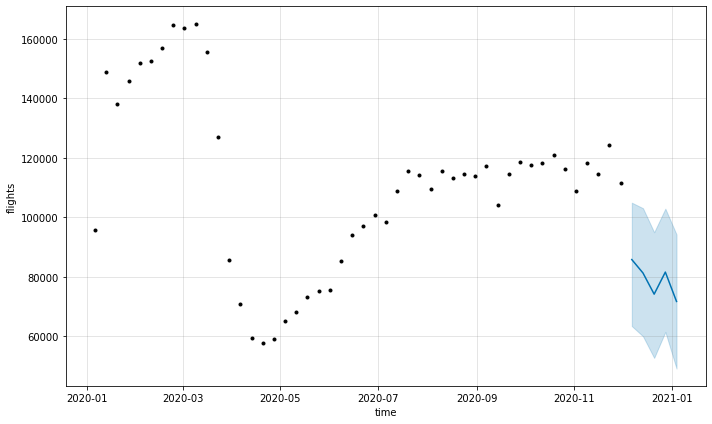

In [0]:
import mlflow
from fbprophet import Prophet
import logging
logging.getLogger('py4j').setLevel(logging.ERROR)

# extract the forecast from our persisted dataset
forecast_pd = (
  spark
    .table('forecast_with_regressors')
    .filter('geoId="US"')
    ).toPandas()

# retrieve the model for this station 
model = mlflow.sklearn.load_model('/mnt/BD-project/timeseries_regressors/US')

# construct a visualization of the forecast
predict_fig = model.plot(forecast_pd, xlabel='time', ylabel='flights')


# display the chart
display(predict_fig)

## Predicted number of flights from China

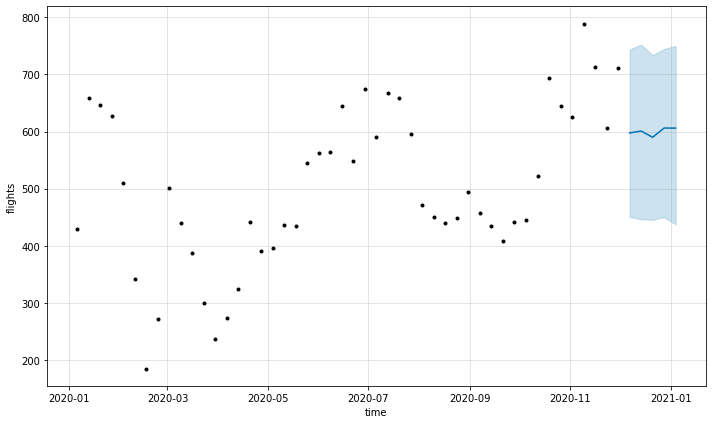

In [0]:
# extract the forecast from our persisted dataset
forecast_pd = (
  spark
    .table('forecast_with_regressors')
    .filter('geoId="CN"')
    ).toPandas()

# retrieve the model for this station 
model = mlflow.sklearn.load_model('/mnt/BD-project/timeseries_regressors/CN')

# construct a visualization of the forecast
predict_fig = model.plot(forecast_pd, xlabel='time', ylabel='flights')


# display the chart
display(predict_fig)

To create the dashboard navigate to the View menu and select + New Dashboard
*